<p dir = "rtl", style = "text-align:right;font-size:22px">
    به نام خدا <br>
    <br>
پروژه درس سیستم های پیچیده
<br>
موضوع: بررسی سیستم های شیوع و اپیدمی
<hr>
<br>
<br>
    اعضای گروه: <br>
    امیررضا قدیانی 99109206 <br>
    علیرضا حبیب زاده 99109206 <br>
    یاسمن کاتبی 99109206 <br>
    <br>
    <br>بهار 1402
    <br>استاد: دکتر شاهین روحانی
        <br>    <br>    <br>
        <br>

<p/>

<p dir = "rtl", style = "text-align:right;font-size:18px">
در بخش اول در ساده ترین حالت یک مدل را در نظر می گیریم که جامعه آن یک گراف کامل است، یعنی تمامی نود ها با هم در ارتباط اند حال در نظر میگیریم:
<br>
تعداد مبتلایان: I
<br>
تعداد در معرض بیماری ها: S
<br>
تعداد بهبود یافتگان: R
<br>
همچنین در نظر می گیریم که در این مدل مرگ و میر نداریم و جمعیت کل ثابت باقی می ماند:<br>
$$ I + S + R = N = cte. $$
<br>
معادلات حاکم بر این مدل به شرح زیر است:
<br>
$$ \frac{dS}{dt} = -\beta * S * I / N $$
<br>
$$ \frac{dI}{dt} = \beta * S * I / N - \gamma * I $$
<br>
$$ \frac{dR}{dt} = \gamma * I $$

<p/>

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

beta = 0.2 and gamma = 0.1


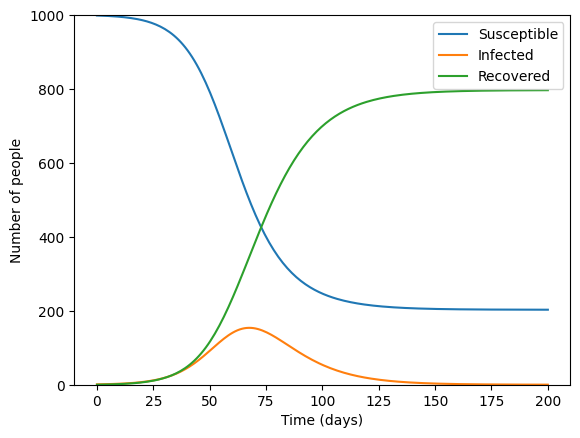

beta = 0.8 and gamma = 0.2


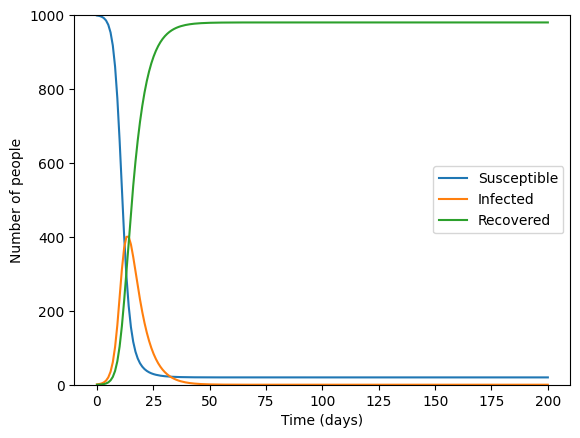

beta = 0.7 and gamma = 0.5


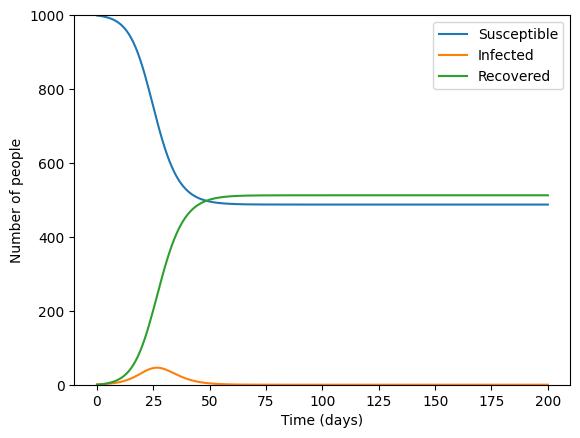

In [28]:
# Define initial conditions
N = 1000          # total population
I0, R0 = 1, 0     # infected and recovered at t=0
S0 = N - I0 - R0  # susceptible at t=0
beta1 = 0.2        # infection rate
beta2 = 0.8        # infection rate
beta3 = 0.7        # infection rate
gamma1 = 0.1       # recovery rate
gamma2 = 0.2       # recovery rate
gamma3 = 0.5       # recovery rate

# Define the differential equations for S, I, and R
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Define the time points to simulate over
t = np.linspace(0, 200, 200)

# Solve the differential equations
y0 = S0, I0, R0
ret1 = odeint(deriv, y0, t, args=(N, beta1, gamma1))
ret2 = odeint(deriv, y0, t, args=(N, beta2, gamma2))
ret3 = odeint(deriv, y0, t, args=(N, beta3, gamma3))
S1, I1, R1 = ret1.T
S2, I2, R2 = ret2.T
S3, I3, R3 = ret3.T

# Plot the results
print("beta = 0.2 and gamma = 0.1")
fig1, ax1 = plt.subplots()
ax1.plot(t, S1, label='Susceptible')
ax1.plot(t, I1, label='Infected')
ax1.plot(t, R1, label='Recovered')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Number of people')
ax1.set_ylim(0, N)
ax1.legend()
plt.show()
print("beta = 0.8 and gamma = 0.2")
fig2, ax2 = plt.subplots()
ax2.plot(t, S2, label='Susceptible')
ax2.plot(t, I2, label='Infected')
ax2.plot(t, R2, label='Recovered')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Number of people')
ax2.set_ylim(0, N)
ax2.legend()
plt.show()
print("beta = 0.7 and gamma = 0.5")
fig3, ax3 = plt.subplots()
ax3.plot(t, S3, label='Susceptible')
ax3.plot(t, I3, label='Infected')
ax3.plot(t, R3, label='Recovered')
ax3.set_xlabel('Time (days)')
ax3.set_ylabel('Number of people')
ax3.set_ylim(0, N)
ax3.legend()
plt.show()


<p dir = "rtl", style = "text-align:right;font-size:18px">
مدل SIRV مدل بعدی است که بررسی می کنیم. این مدل بر پایه مدل قبلی است با این تفاوت که واکسینه کردن افراد هم در آن درنظر گرفته شده است. افراد واکسینه را با V نشان می دهیم و در نظر می گیریم که با آهنگی مشخص مردم واکسینه می شوند. معادلات جدید به شرح زیر اند:
<br>
dS/dt = -beta * S * I / N + mu * N - sigma * S
<br>
dI/dt = beta * S * I / N - gamma * I - mu * I
<br>
dR/dt = gamma * I - mu * R
<br>
dV/dt = sigma * S - mu * V
<p/>


beta = 0.3, gamma = 0.1, sigma = 0.01, mu = 0.005 


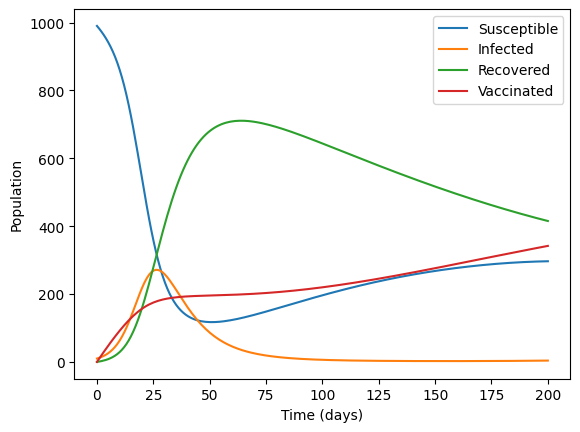

beta = 0.7, gamma = 0.2, sigma = 0.01, mu = 0.005 


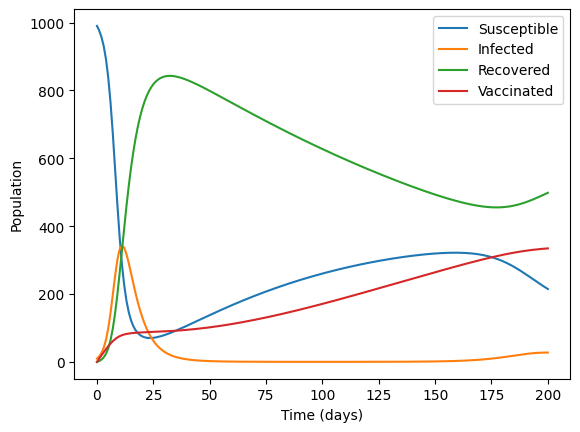

beta = 0.4, gamma = 0.1, sigma = 0.08, mu = 0.005 


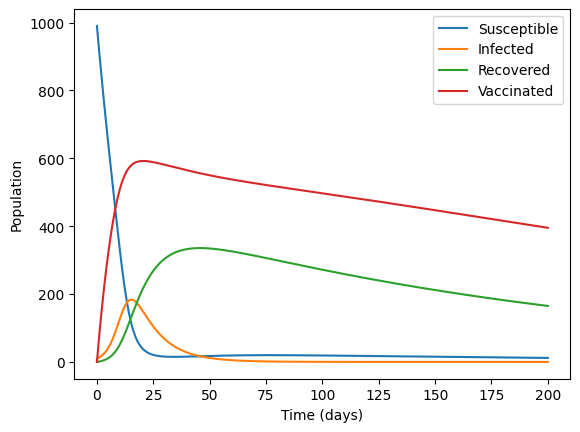

In [29]:
# Define the SIRV model    
def sirv_model(y, t, beta, gamma, sigma, mu):
    S, I, R, V = y
    N = S + I + R
    dSdt = -beta * S * I / N + mu * N - sigma * S
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    dVdt = sigma * S - mu * V
    return [dSdt, dIdt, dRdt, dVdt]

# Set the initial conditions and parameters
S0 = 990
I0 = 10
R0 = 0
V0 = 0
beta1 = 0.3
beta2 = 0.7
beta3 = 0.4
gamma1 = 0.1
gamma2 = 0.2
gamma3 = 0.1
sigma1 = 0.01
sigma2 = 0.01
sigma3 = 0.08
mu1 = 0.005
mu2 = 0.005
mu3 = 0.005
t = np.linspace(0, 200, 200)

# Solve the differential equations
sol1 = odeint(sirv_model, [S0, I0, R0, V0], t, args=(beta1, gamma1, sigma1, mu1))
sol2 = odeint(sirv_model, [S0, I0, R0, V0], t, args=(beta2, gamma2, sigma2, mu2))
sol3 = odeint(sirv_model, [S0, I0, R0, V0], t, args=(beta3, gamma3, sigma3, mu3))
S1, I1, R1, V1 = sol1.T
S2, I2, R2, V2 = sol2.T
S3, I3, R3, V3 = sol3.T

# Plot the results
print("beta = 0.3, gamma = 0.1, sigma = 0.01, mu = 0.005 ")
plt.plot(t, S1, label='Susceptible')
plt.plot(t, I1, label='Infected')
plt.plot(t, R1, label='Recovered')
plt.plot(t, V1, label='Vaccinated')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.show()

print("beta = 0.7, gamma = 0.2, sigma = 0.01, mu = 0.005 ")
plt.plot(t, S2, label='Susceptible')
plt.plot(t, I2, label='Infected')
plt.plot(t, R2, label='Recovered')
plt.plot(t, V2, label='Vaccinated')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.show()


print("beta = 0.4, gamma = 0.1, sigma = 0.08, mu = 0.005 ")
plt.plot(t, S3, label='Susceptible')
plt.plot(t, I3, label='Infected')
plt.plot(t, R3, label='Recovered')
plt.plot(t, V3, label='Vaccinated')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.show()

<p dir = "rtl", style = "text-align:right;font-size:18px">
مدل SIRD مدل بعدی است که بررسی می کنیم. این مدل بر پایه مدل SIR است با این تفاوت که افرادی که می میرند و افرادی که بهبود پیدا می کنند را تمیز دهیم. در اینجا افرادی که به واسطه بیماری می میرند را با D نشان می دهیم. معادلات جدید به شرح زیر اند:
<br>
dS/dt = -beta * S * I
<br>
dI/dt = beta * S * I - (gamma + mu) * I
<br>
dR/dt = gamma * I
<br>
dD/dt = mu * I
<p/>



beta = 0.3, gamma = 0.1, mu = 0.01 


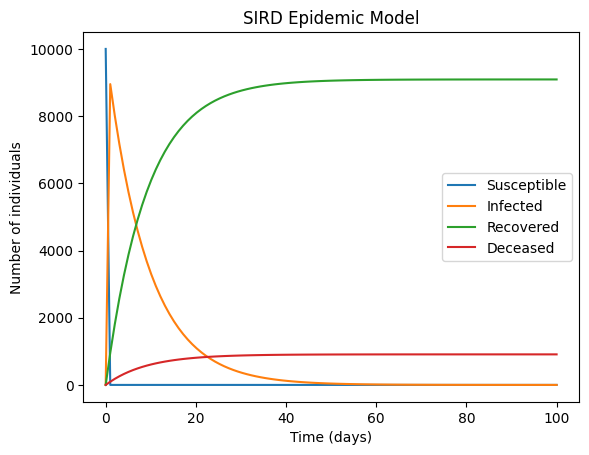

beta = 0.8, gamma = 0.2, mu = 0.01 


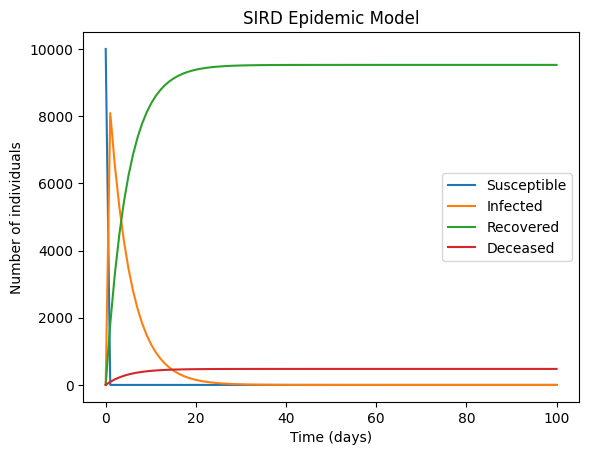

beta = 0.3, gamma = 0.1, mu = 0.09 


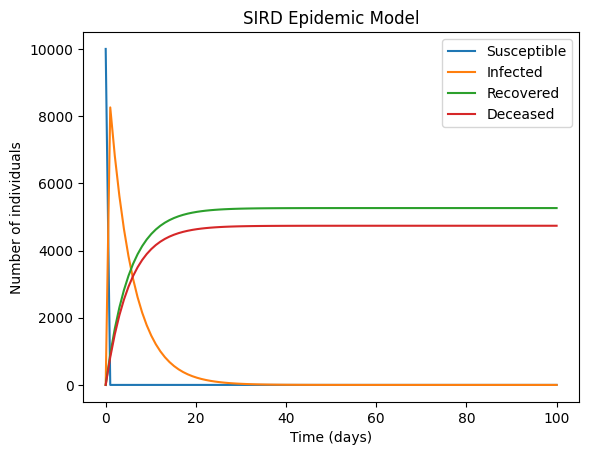

In [30]:
# Function to define the SIRD model
def sird_model(y, t, beta, gamma, mu):
    S, I, R, D = y

    dSdt = -beta * S * I
    dIdt = beta * S * I - (gamma + mu) * I
    dRdt = gamma * I
    dDdt = mu * I

    return [dSdt, dIdt, dRdt, dDdt]

# Initial conditions
S0 = 9999    # number of susceptible individuals
I0 = 1       # number of infected individuals
R0 = 0       # number of recovered individuals
D0 = 0       # number of deceased individuals

# Total population
N = S0 + I0 + R0 + D0

# Contact rate, recovery rate, and mortality rate
beta1 = 0.3   # contact rate
beta2 = 0.8   # contact rate
beta3 = 0.3   # contact rate
gamma1 = 0.1  # recovery rate
gamma2 = 0.2  # recovery rate
gamma3 = 0.1  # recovery rate
mu1 = 0.01    # mortality rate
mu2 = 0.01    # mortality rate
mu3 = 0.09    # mortality rate

# Time vector
t = np.linspace(0, 100, 100)   # simulate for 100 days

# Solve the SIRD model
solution1 = odeint(sird_model, [S0, I0, R0, D0], t, args=(beta1, gamma1, mu1))
solution2 = odeint(sird_model, [S0, I0, R0, D0], t, args=(beta2, gamma2, mu2))
solution3 = odeint(sird_model, [S0, I0, R0, D0], t, args=(beta3, gamma3, mu3))
S1, I1, R1, D1 = solution1.T
S2, I2, R2, D2 = solution2.T
S3, I3, R3, D3 = solution3.T

# Plotting the results
print("beta = 0.3, gamma = 0.1, mu = 0.01 ")
plt.plot(t, S1, label='Susceptible')
plt.plot(t, I1, label='Infected')
plt.plot(t, R1, label='Recovered')
plt.plot(t, D1, label='Deceased')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('SIRD Epidemic Model')
plt.legend()
plt.show()

print("beta = 0.8, gamma = 0.2, mu = 0.01 ")
plt.plot(t, S2, label='Susceptible')
plt.plot(t, I2, label='Infected')
plt.plot(t, R2, label='Recovered')
plt.plot(t, D2, label='Deceased')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('SIRD Epidemic Model')
plt.legend()
plt.show()

print("beta = 0.3, gamma = 0.1, mu = 0.09 ")
plt.plot(t, S3, label='Susceptible')
plt.plot(t, I3, label='Infected')
plt.plot(t, R3, label='Recovered')
plt.plot(t, D3, label='Deceased')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('SIRD Epidemic Model')
plt.legend()
plt.show()


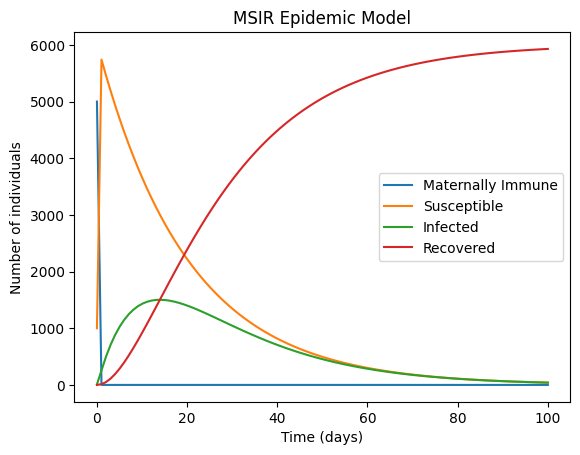

In [31]:
# Function to define the MSIR model
def msir_model(y, t, beta, gamma, sigma):
    M, S, I, R = y

    dMdt = -beta * M * I
    dSdt = beta * M * I - sigma * S
    dIdt = sigma * S - gamma * I
    dRdt = gamma * I

    return [dMdt, dSdt, dIdt, dRdt]

# Initial conditions
M0 = 5000   # number of maternally immune individuals
S0 = 1000   # number of susceptible individuals
I0 = 10     # number of infected individuals
R0 = 0      # number of recovered individuals

# Total population
N = M0 + S0 + I0 + R0

# Contact rate, recovery rate, and loss of maternal immunity rate
beta = 0.3   # contact rate
gamma = 0.1  # recovery rate
sigma = 0.05 # loss of maternal immunity rate

# Time vector
t = np.linspace(0, 100, 100)   # simulate for 100 days

# Solve the MSIR model
solution = odeint(msir_model, [M0, S0, I0, R0], t, args=(beta, gamma, sigma))
M, S, I, R = solution.T

# Plotting the results
plt.plot(t, M, label='Maternally Immune')
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('MSIR Epidemic Model')
plt.legend()
plt.show()

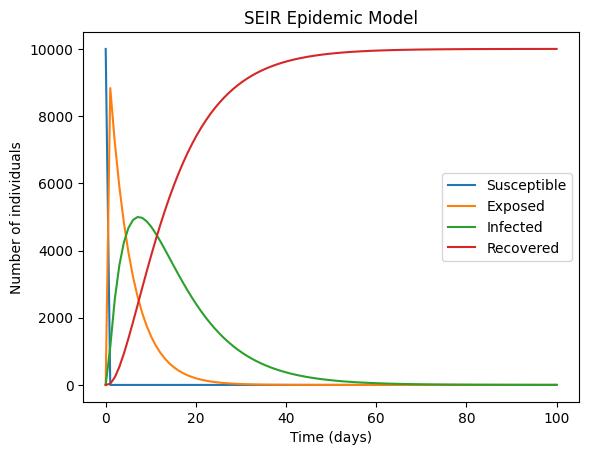

In [32]:
# Function to define the SEIR model
def seir_model(y, t, beta, gamma, sigma):
    S, E, I, R = y

    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I

    return [dSdt, dEdt, dIdt, dRdt]

# Initial conditions
S0 = 9999   # number of susceptible individuals
E0 = 1      # number of exposed individuals
I0 = 0      # number of infected individuals
R0 = 0      # number of recovered individuals

# Total population
N = S0 + E0 + I0 + R0

# Contact rate, recovery rate, and incubation period
beta = 0.3   # contact rate
gamma = 0.1  # recovery rate
sigma = 0.2  # incubation period

# Time vector
t = np.linspace(0, 100, 100)   # simulate for 100 days

# Solve the SEIR model
solution = odeint(seir_model, [S0, E0, I0, R0], t, args=(beta, gamma, sigma))
S, E, I, R = solution.T

# Plotting the results
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('SEIR Epidemic Model')
plt.legend()
plt.show()


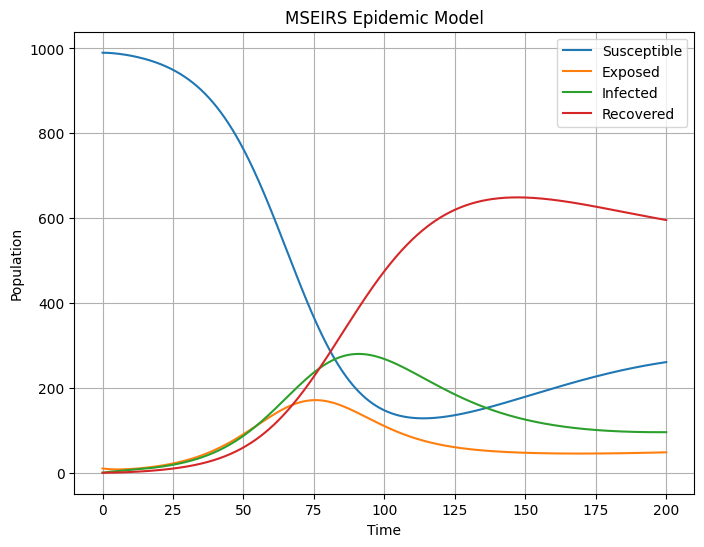

In [33]:
# Define the MSEIRS model function
def mseirs_model(y, t, beta, sigma, gamma, mu):
    S, E, I, R, N = y

    dSdt = -beta * S * I / N + mu * R
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I - mu * R
    dNdt = 0

    return [dSdt, dEdt, dIdt, dRdt, dNdt]

# Set the parameters
beta = 0.2   # transmission rate
sigma = 0.1  # incubation rate
gamma = 0.05 # recovery rate
mu = 0.01    # immunity loss rate

# Set the initial conditions
S0 = 990   # initial susceptible population
E0 = 10    # initial exposed population
I0 = 0     # initial infected population
R0 = 0     # initial recovered population
N = S0 + E0 + I0 + R0   # total population

y0 = [S0, E0, I0, R0, N]  # initial state vector

# Set the time points for simulation
t = np.linspace(0, 200, 1000)

# Solve the differential equations
sol = odeint(mseirs_model, y0, t, args=(beta, sigma, gamma, mu))
S, E, I, R, N = sol.T

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('MSEIRS Epidemic Model')
plt.legend()
plt.grid(True)
plt.show()


## مدل‌سازی با گراف

در این بخش با استفاده از گراف شیوع بیماری را شبیه‌سازی می‌کنیم.
هر کدام از رئوس نشان‌دهنده‌ی یک فرد است. هر راس دارای یکی از مقادیر
S یا I یا R
می‌باشد که معانی آن مطابق همان مدل
SIR است.

در هر پله‌ی زمانی افرادی که بیمار هستند متناسب با وزن یالی که با افراد سالم دارند احتمال دارد آن‌ها را بیمار کنند.

وزن یال‌های گراف نشان دهنده‌ی میزان ارتباط دو فرد در جامعه با هم است. ما در ابتدا این مقادیر را با مقادیر تصادفی تعیین می‌کنیم.

برای مثال برای شبیه‌سازی گسترش بیماری در دو شهر مجاور هم باید رئوس را دو دسته کرد که ارتباط قوی‌ای میان هر دسته و ارتباط ضعیفی میان دسته‌های متفاوت (سفر بین دو شهر) وجود دارد.

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [1]:
graph = nx.Graph()

num_nodes = 100  # Adjust this as per your requirements
num_edges = 200  # Adjust this as per your requirements

# Add nodes to the graph
graph.add_nodes_from(range(num_nodes))

# Add edges to the graph with random weights
for _ in range(num_edges):
    node1 = random.randint(0, num_nodes - 1)
    node2 = random.randint(0, num_nodes - 1)
    weight = random.random()  # Adjust this as per your requirements
    graph.add_edge(node1, node2, weight=weight)

NameError: name 'nx' is not defined

In [ ]:
# Define the initial number of infected nodes
initial_infected = 5  # Adjust this as per your requirements

# Set up the state of each node in the graph
state = {}
for node in graph.nodes():
    if node < initial_infected:
        state[node] = 'I'  # 'I' represents infected
    else:
        state[node] = 'S'  # 'S' represents susceptible

In [ ]:
# Define the parameters for the SIR model
transmission_rate = 0.2  # Probability of infection from an infected neighbor
recovery_rate = 0.1     # Probability of recovery

# Initialize the figure and axis for the animation
fig, ax = plt.subplots()

# Create an empty dictionary to store the positions of the nodes
pos = nx.spring_layout(graph)

# Create an empty list to store each frame of the animation
frames = []

# Function to update the graph visualization at each step of the simulation
def update(frame):
    # Clear the current graph
    ax.clear()

    # Draw the graph with nodes colored based on their state
    colors = {'S': 'green', 'I': 'red', 'R': 'blue'}
    node_colors = [colors[state[node]] for node in graph.nodes()]
    nx.draw(graph, pos, node_color=node_colors, ax=ax)

    # Perform one step of the simulation
    infected_nodes = [node for node in state if state[node] == 'I']
    for node in infected_nodes:
        neighbors = graph.neighbors(node)
        for neighbor in neighbors:
            if state[neighbor] == 'S' and random.random() < transmission_rate:
                state[neighbor] = 'I'
        if random.random() < recovery_rate:
            state[node] = 'R'

    # Append the current frame to the list of frames
    frames.append([plt.gca().get_xlim(), plt.gca().get_ylim()])

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(50), interval=500)

# Save the animation as a GIF
ani.save('graph_animation.gif', writer='pillow')

# Display the animation
plt.show()